## t-SNE on MNIST dataset

### Task1: Read the data from "mnist_train.csv" file using pandas and separate the 'label' column to use later for coloring

In [2]:
import pandas as pd
import numpy as np

In [6]:
mnist = pd.read_csv('mnist_train.csv')
X = mnist.iloc[:,1:]
X

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
label = mnist['label']
label

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

### Task 2: Perform PCA to reduce the dimensionality to 2 for plotting

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
st_X = scaler.fit_transform(X)

In [25]:
pca_st = PCA(n_components=2)
st_X = pca_st.fit_transform(st_X)

In [26]:
st_X.shape

(60000, 2)

### Task 3: Plot the two dimensional points resulting from the PCA

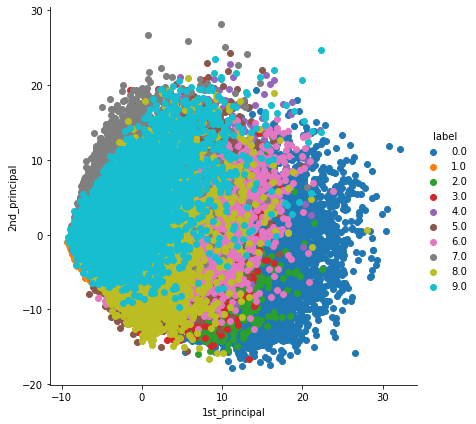

In [27]:
st_X = np.vstack((st_X.T, label)).T

pca_df = pd.DataFrame(data=st_X, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

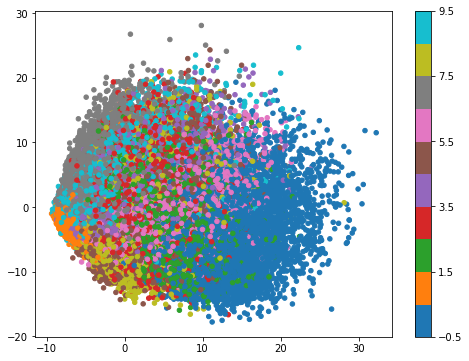

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(st_X[:,0], st_X[:,1], c=label, s=20, cmap='tab10');
plt.colorbar(boundaries=np.linspace(-0.5,9.5,11));

### Task 4: Perform T-SNE to reduce the dimension to 2 for plotting
Note: it might take minutes (~10mins) with the default parameters and the full data. If it takes too long you can try using part of the data (e.g. the first 10000 rows)

In [9]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(perplexity=10)
X_2d = tsne.fit_transform(X)

### Task 5: Plot the two dimensional points resulting from the T-SNE

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=label, s=5, cmap='tab10')
plt.colorbar()
plt.show()

### Optional: Try different parameters, try to change the perplexity

In [32]:
tsne = TSNE(perplexity=5)
X_2d = tsne.fit_transform(st_X)

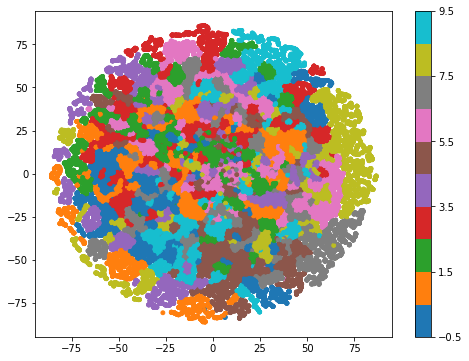

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=label, s=15, cmap = 'tab10');
plt.colorbar(boundaries=np.linspace(-0.5,9.5,11));

In [34]:
tsne = TSNE(perplexity=20)
X_2d = tsne.fit_transform(st_X)

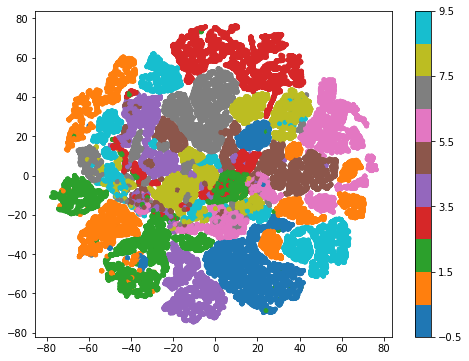

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=label, s=15, cmap = 'tab10');
plt.colorbar(boundaries=np.linspace(-0.5,9.5,11));

In [36]:
tsne = TSNE(n_components=3, perplexity=15)
X_3d = tsne.fit_transform(st_X)

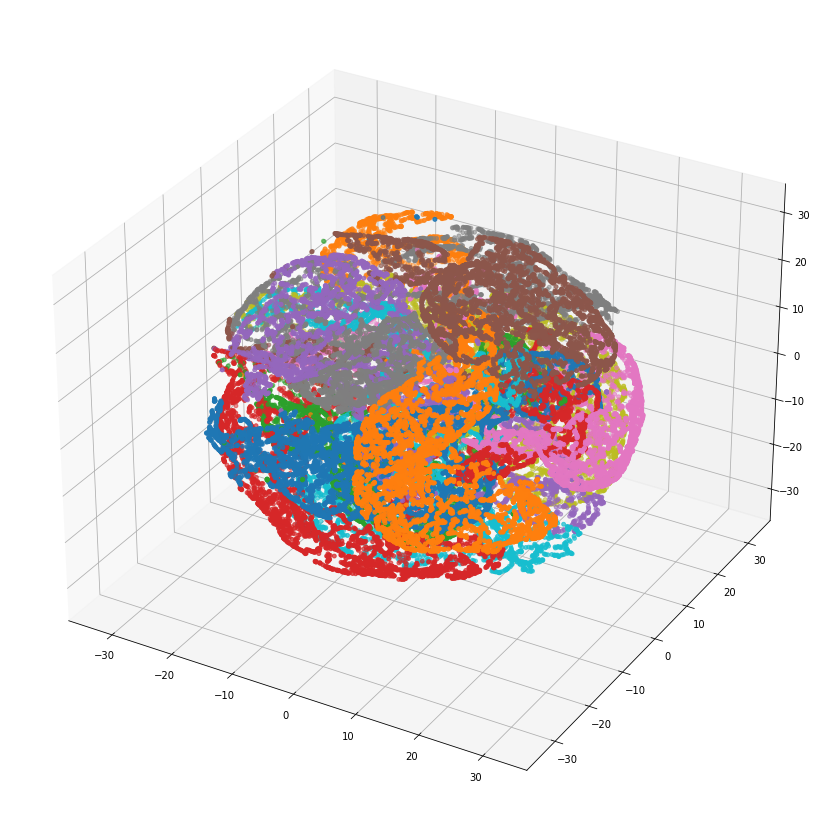

In [40]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_3d[:,0], X_3d[:,1], X_3d[:,2], c=label, s=15, cmap='tab10')
plt.show()